In [94]:
import numpy as np 
import pandas as pd 

In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [96]:
BASE_DIR = 'C:/Users/Sara Bharat Mali/OneDrive/Desktop/codeclause/task_1/UTK/utkface_aligned_cropped/UTKFace'

In [97]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    img_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(img_path)
    age_labels.append(age)
    gender_labels.append(gender)
    

  0%|          | 0/23708 [00:00<?, ?it/s]

In [98]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,C:/Users/Sara Bharat Mali/OneDrive/Desktop/cod...,100,0
1,C:/Users/Sara Bharat Mali/OneDrive/Desktop/cod...,100,0
2,C:/Users/Sara Bharat Mali/OneDrive/Desktop/cod...,100,1
3,C:/Users/Sara Bharat Mali/OneDrive/Desktop/cod...,100,1
4,C:/Users/Sara Bharat Mali/OneDrive/Desktop/cod...,100,1


In [99]:
gender_dict = {
    0: 'Male',
    1: 'Female'
}

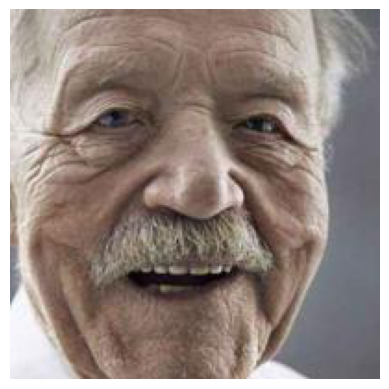

In [100]:
from PIL import Image 
img = Image.open(df['image'][0]) 
plt.axis('off') 
plt.imshow(img)

<Axes: xlabel='age', ylabel='Density'>

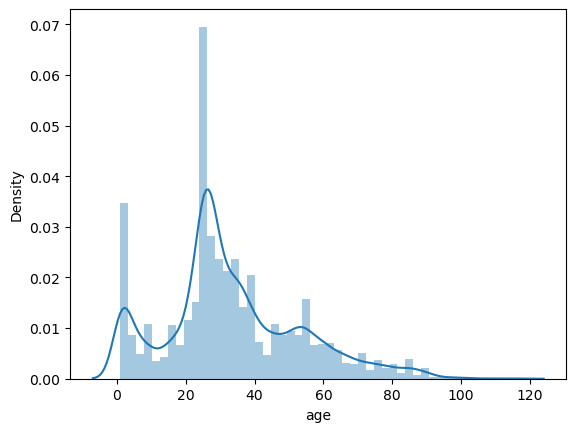

In [101]:
sns.distplot(df['age'])

In [102]:
print(df['gender'].value_counts())

gender
0    12391
1    11317
Name: count, dtype: int64


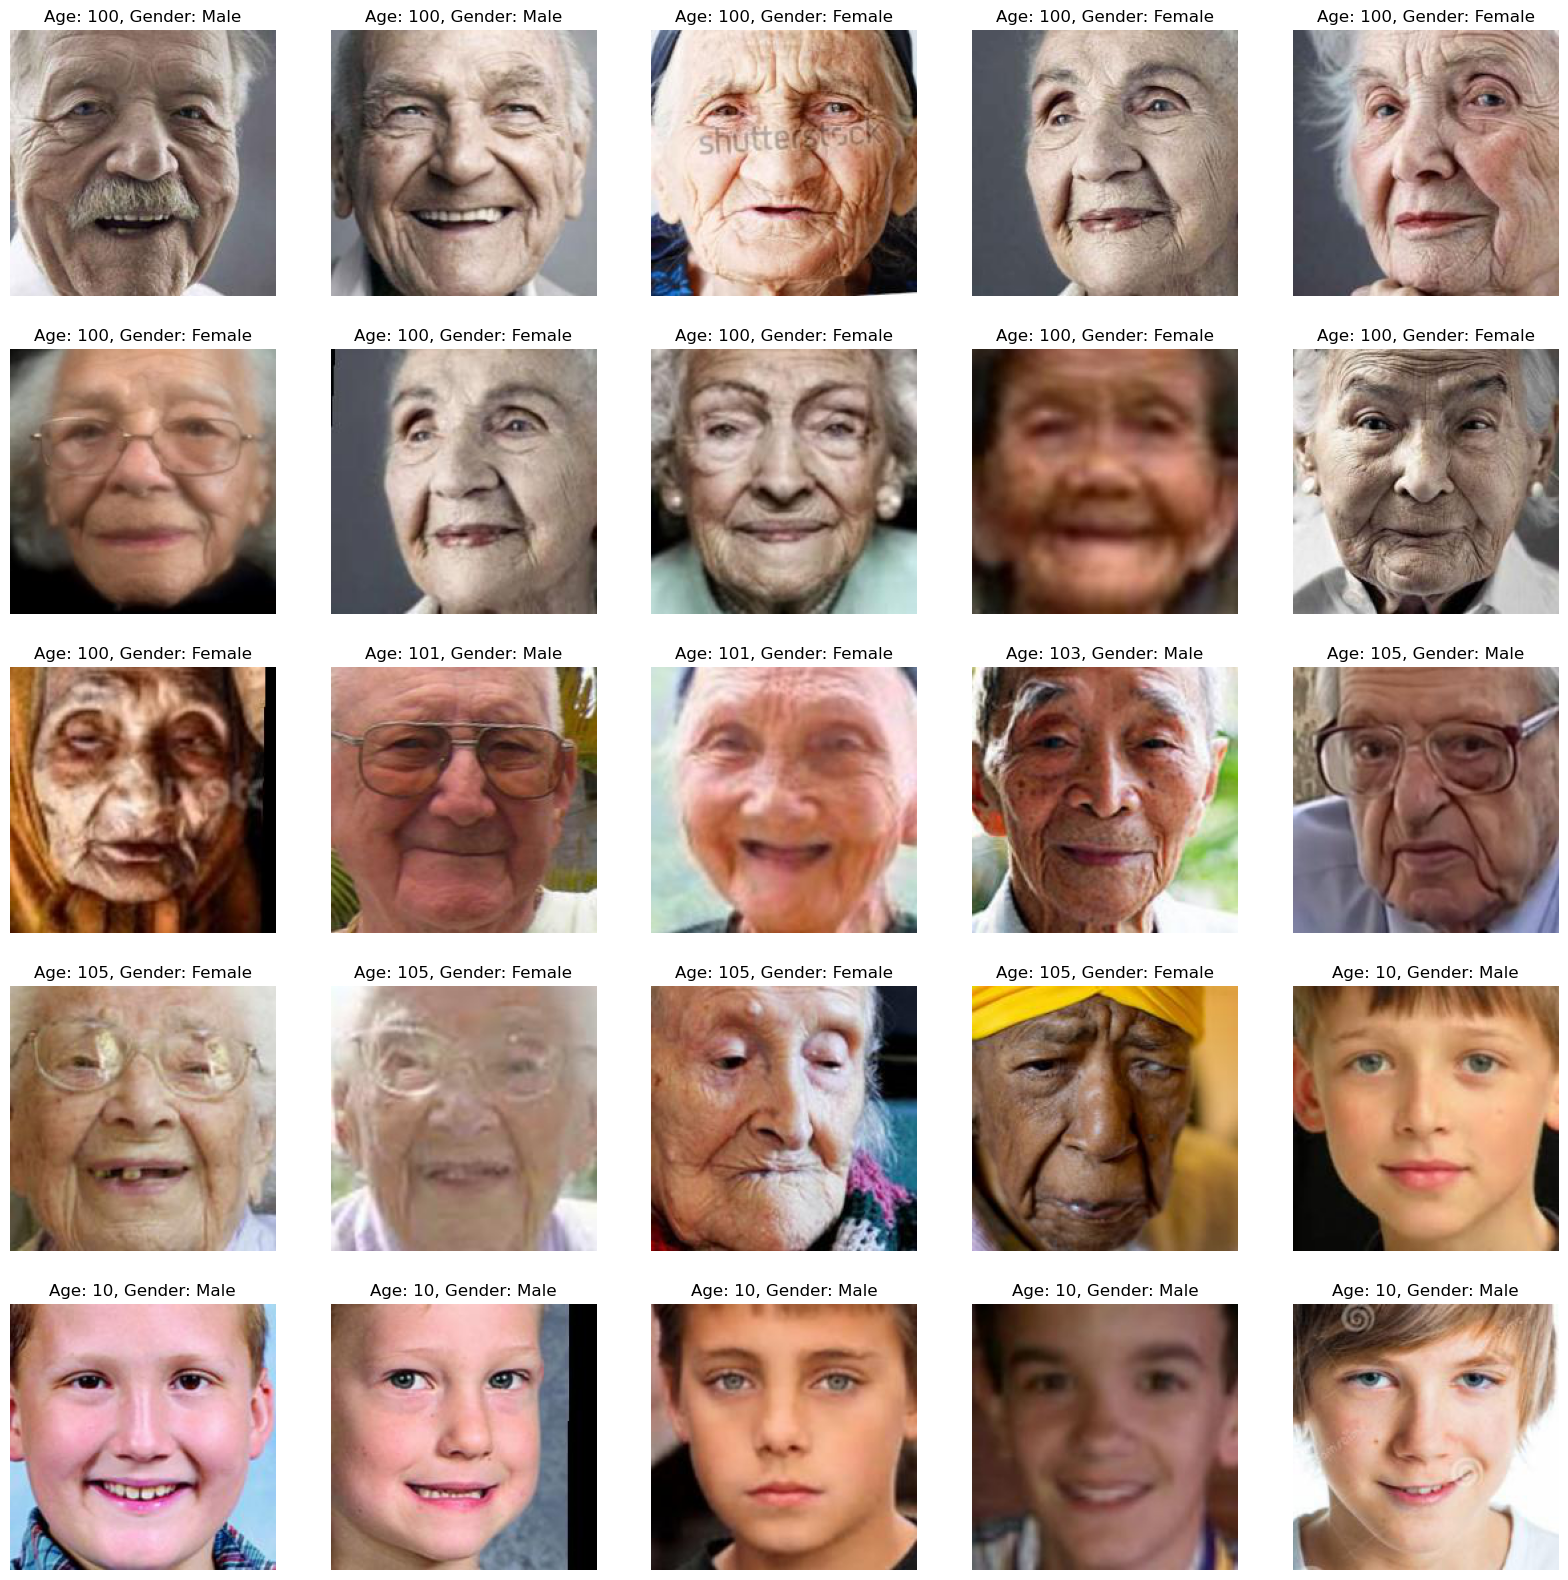

In [103]:
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age}, Gender: {gender_dict[gender]}")
    plt.axis('off')

In [104]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.AFFINE)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [105]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [106]:
X.shape

(23708, 128, 128, 1)

In [107]:
X = X/255.0

In [108]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [109]:
input_shape = (128, 128, 1)

In [110]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2)) (conv_1)

conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2)) (conv_2)

conv_3 = Conv2D(238, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2)) (conv_3)

conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2)) (conv_4)

flatten = Flatten() (maxp_4)

dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [111]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 126, 126, 32)         320       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)           0         ['conv2d_12[0][0]']           
 ng2D)                                                                                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 61, 61, 64)           18496     ['max_pooling2d_12[0][0]

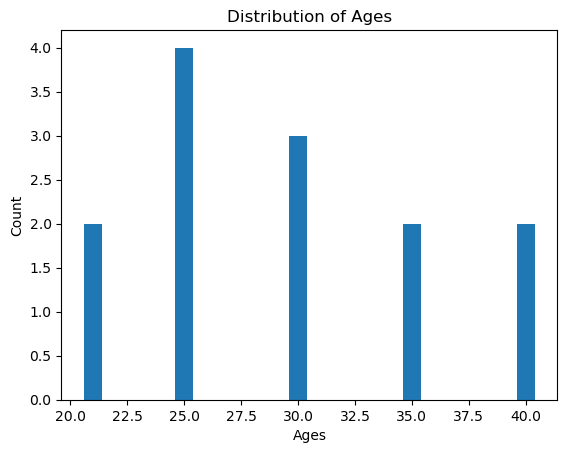

Max value: 40


In [112]:
import matplotlib.pyplot as plt

ages = [21, 25, 30, 25, 35, 40, 30, 25, 30, 35, 40, 21, 25]

x_ages = list(set(ages))
y_ages = [ages.count(i) for i in x_ages]

plt.bar(x_ages, y_ages)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

max_age = max(ages)
print("Max value:", max_age)


In [113]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=4, validation_split=0.2)

Epoch 1/4
593/593 [==============================] - 230s 381ms/step - loss: 11.1344 - gender_out_loss: 0.6986 - age_out_loss: 10.4358 - gender_out_accuracy: 0.5137 - age_out_accuracy: 0.0587 - val_loss: 36.2216 - val_gender_out_loss: 0.6736 - val_age_out_loss: 35.5481 - val_gender_out_accuracy: 0.5810 - val_age_out_accuracy: 0.0000e+00
Epoch 2/4
593/593 [==============================] - 1041s 2s/step - loss: 8.5274 - gender_out_loss: 0.5678 - age_out_loss: 7.9596 - gender_out_accuracy: 0.6924 - age_out_accuracy: 0.0419 - val_loss: 29.0282 - val_gender_out_loss: 0.5351 - val_age_out_loss: 28.4931 - val_gender_out_accuracy: 0.7379 - val_age_out_accuracy: 0.0000e+00
Epoch 3/4
593/593 [==============================] - 214s 360ms/step - loss: 7.6810 - gender_out_loss: 0.4731 - age_out_loss: 7.2078 - gender_out_accuracy: 0.7703 - age_out_accuracy: 0.0221 - val_loss: 29.1575 - val_gender_out_loss: 0.4736 - val_age_out_loss: 28.6839 - val_gender_out_accuracy: 0.7708 - val_age_out_accuracy: 

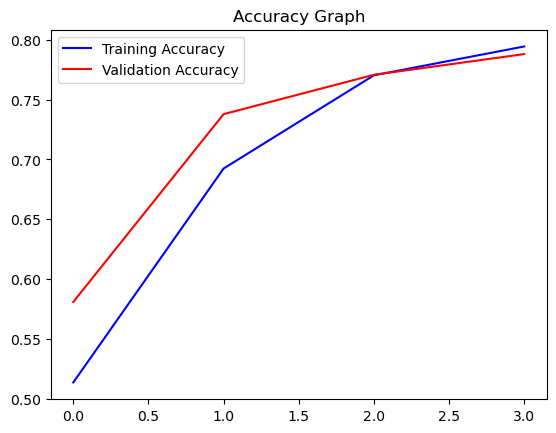

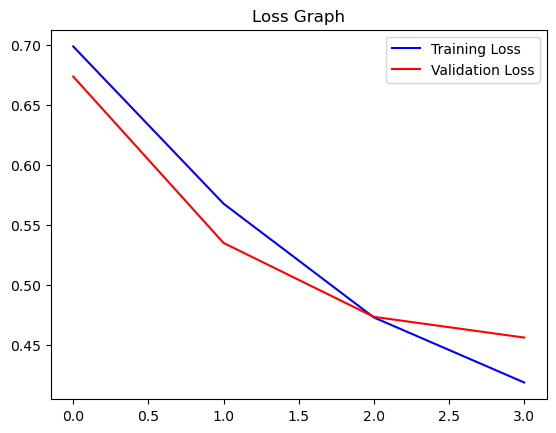

In [114]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

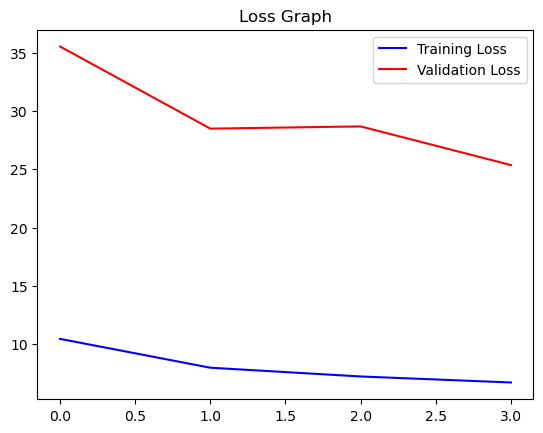

In [115]:
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

1/1 [==============================] - 0s 223ms/step


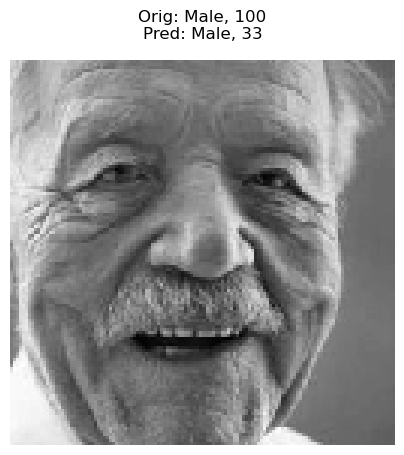

1/1 [==============================] - 0s 51ms/step


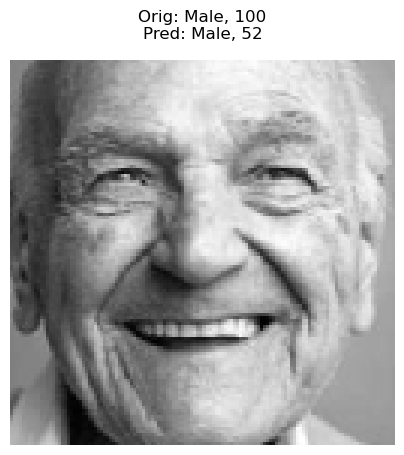

1/1 [==============================] - 0s 63ms/step


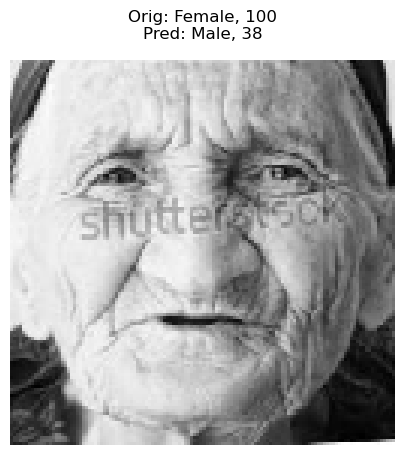

1/1 [==============================] - 0s 48ms/step


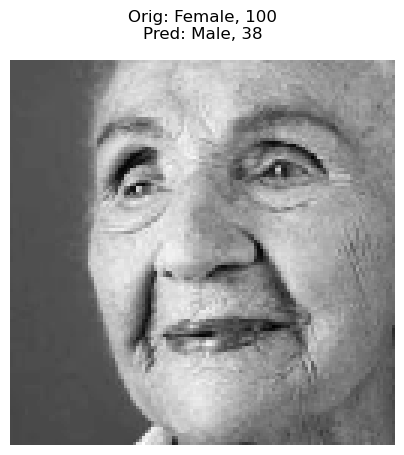

1/1 [==============================] - 0s 79ms/step


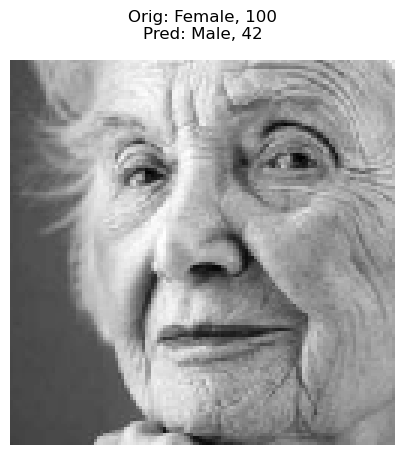

1/1 [==============================] - 0s 63ms/step


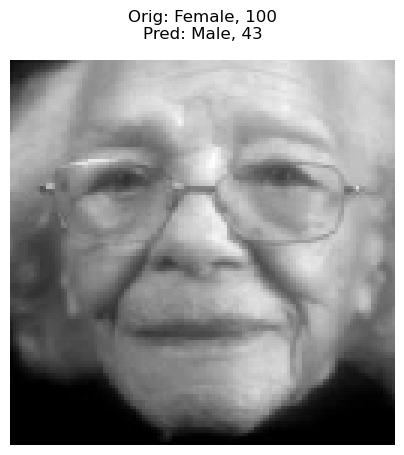

1/1 [==============================] - 0s 54ms/step


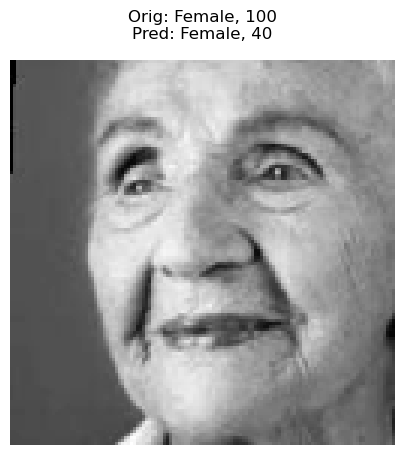

1/1 [==============================] - 0s 63ms/step


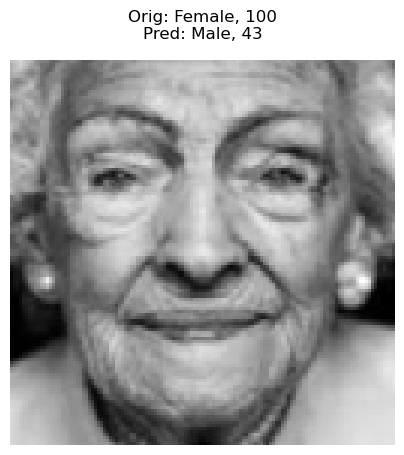

In [116]:
import matplotlib.pyplot as plt

def display_image_with_info(image, gender_label, age_label, model_prediction):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    pred_gender = gender_dict[int(round(float(model_prediction[0][0])))]
    pred_age = int(round(float(model_prediction[1][0])))

    ax.imshow(image.reshape(128, 128), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Orig: {gender_dict[gender_label]}, {age_label}\nPred: {pred_gender}, {pred_age}", pad=15)

    plt.show()

num_images_to_show = 8

for i in range(num_images_to_show):
    image_indx = i
    display_image_with_info(X[image_indx], gender_labels[image_indx], age_labels[image_indx], model.predict(X[image_indx].reshape(1, 128, 128, 1)))
